# Stable Diffusion
 O Stable Diffusion é um modelo de difusão open source desenvolvido pela Stability AI que alcançou resultados impressionantes na geração automática de imagens a partir de texto. Algumas de suas principais características:

- Baseado na técnica diffusion models, que adiciona ruído aleatório a uma imagem e depois aprende a remover esse ruído para recriar a imagem original.

- Treinado de forma autossupervisionada em um conjunto de dados de imagem de internet não rotulado em escala sem precedentes, com mais de 2 bilhões de parâmetros.

- Capaz de gerar uma ampla variedade de imagens realistas e coerentes condicionadas por descrições textuais curtas. Cobre uma vasta gama de conceitos e cenários.

- Incorpora algoritmos de prevenção de danos para evitar a geração de conteúdos tendenciosos, violentos ou explícitos.

- Demonstrou qualidade de geração de imagens comparável, e por vezes superior, a muitos modelos proprietários bem maiores.

- Tendo um forte impacto por ser um dos primeiros modelos enormes open source para geração de imagens acessível a qualquer pessoa com GPU.


In [ ]:
!pip install diffusers transformers accelerate safetensors

In [ ]:
from diffusers import DiffusionPipeline, StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImageVariationPipeline
import torch
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from io import BytesIO
import requests

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

## Unconditional

In [ ]:
pretrained_model_or_path = "CompVis/ldm-celebahq-256"

In [ ]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path)
imagem = pipeline(num_inference_steps=50).images[0]

vqvae/diffusion_pytorch_model.safetensors not found


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

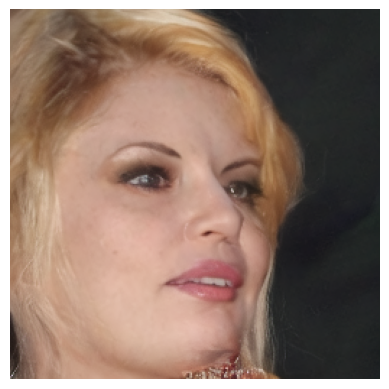

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Simple

In [ ]:
pretrained_model_or_path ="stabilityai/stable-diffusion-xl-base-1.0"
prompt = "A photo realistic clown fish in an aquarium"

In [ ]:
pipeline = DiffusionPipeline.from_pretrained(pretrained_model_or_path,
                                         torch_dtype=torch.float16, use_safetensors=True).to("cuda")
#fatiamento de atenção reduz o uso de memória
pipeline.enable_attention_slicing()
imagem = pipeline(prompt=prompt).images[0]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

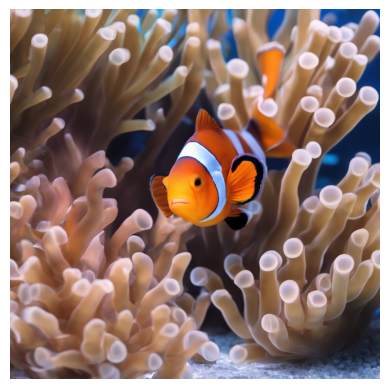

In [ ]:
plt.axis('off')
plt.imshow(imagem)
plt.show()

## Condicional com mais Parâmetros

In [ ]:
prompt = "Create a serene landscape with a mountain in the background, a flowing river in the foreground, and a clear blue sky."
negative_prompt = "Do not include any human or animal figures in the landscape."
pretrained_model_or_path =  "stabilityai/stable-diffusion-2-1-base"
num_images_per_prompt = 3
num_inference_steps = 100
height = 512
width = 512
guidance_scale = 8

In [ ]:
scheduler = EulerDiscreteScheduler.from_pretrained(pretrained_model_or_path, subfolder="scheduler")
pipeline = StableDiffusionPipeline.from_pretrained(pretrained_model_or_path ,
                                                   scheduler=scheduler, torch_dtype=torch.float16).to("cuda")

In [ ]:
#reprodutividade
generator = torch.Generator(device="cuda").manual_seed(123)
imagem = pipeline(prompt=prompt, num_images_per_prompt=num_images_per_prompt,
           negative_prompt = negative_prompt,
           num_inference_steps=num_inference_steps,
           height = height, width = width,
           guidance_scale = guidance_scale,
           generator = generator
           )

  0%|          | 0/100 [00:00<?, ?it/s]

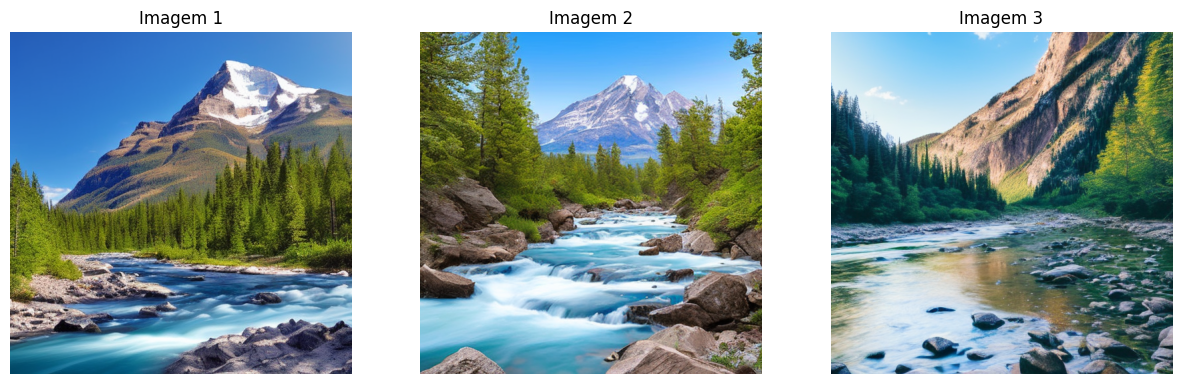

In [ ]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()

## Variações de uma imagem

In [ ]:
pretrained_model_or_path = "lambdalabs/sd-image-variations-diffusers"
url = "https://s3.amazonaws.com/nightjarprod/content/uploads/sites/130/2021/08/19085635/gEU2QniE6E77NI6lCU6MxlNBvIx-scaled.jpg"
num_images_per_prompt = 3
num_inference_steps = 100

In [ ]:
pipeline = StableDiffusionImageVariationPipeline.from_pretrained(pretrained_model_or_path, revision="v2.0").to("cuda")
response = requests.get(url)
imagem_web = Image.open(BytesIO(response.content)).convert("RGB")
imagem = pipeline(imagem_web, num_images_per_prompt =num_images_per_prompt,  num_inference_steps = num_inference_steps)

unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/100 [00:00<?, ?it/s]

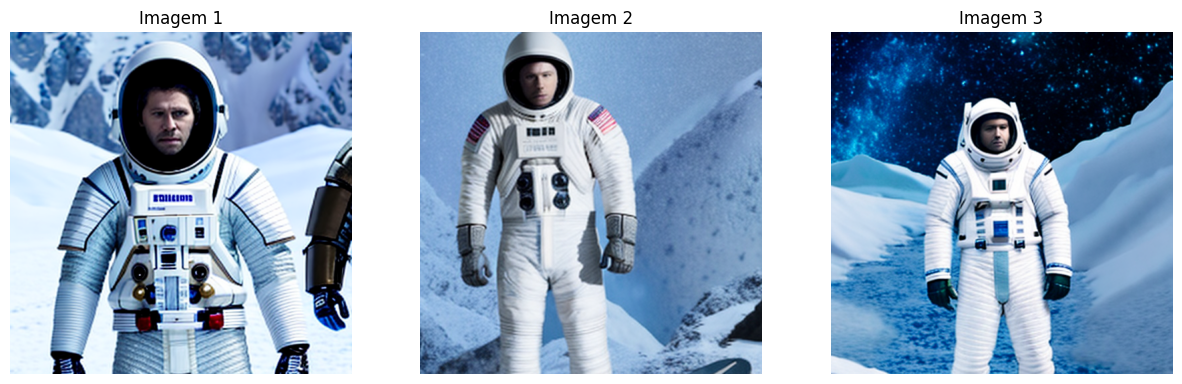

In [ ]:
num_images = len(imagem["images"])
plt.figure(figsize=(15,5))
for i, img in enumerate(imagem["images"]):
    plt.subplot(1, num_images, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Imagem {i+1}')
plt.show()